# **IGNORING WARNINGS**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# **IMPORTING THE MODULES FOR DATA IMPORTATION, MANIPULATION AND VISUALISATION**

The pandas module is used for data importation and manipulation, while the numpy, seaborn and matplotlib are used for data cleaning and visualisation.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# IMPORTING THE DATASET FROM THE LOCAL COMPUTER

In [3]:
df= pd.read_csv('diabetes.csv')

**Checking the first 10 entries on the columns of the Dataset**

In [4]:
df.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The dataset contains 9 columns and 768 rows, the first 7 rows contains continous data while the last column contains a boolean categorical entries. The 'outcome' dataset requires to be transformed from the boolean integer type to a more interactive categorical int data type.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'] = df.Outcome.replace({True: 1, False: 0}) #TRANSFORMING THE OUTCOME COLUMN FROM BOOLEAN DATA STRUCTURE TO INT DATA TYPE

In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Visualising the raw data shows that there are outliers in the data, the operation below is used to check for the quartile where the outliers are located in the whole bulk of the data accross the columns. The boxplot shows that all the continous data in the columns contains outliers or extraneous data. The presence of too many outliers in a given dataset reduces the accuracy whichever machine learning algorithms applied to the data

<AxesSubplot:>

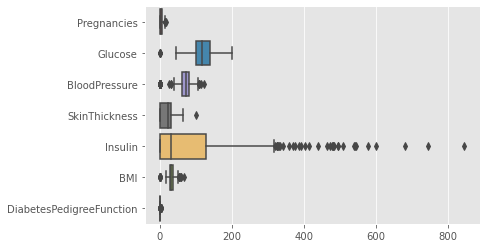

In [10]:
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']], orient = "h", dodge = False)

The code below removes the outliers in the columns observed above

In [11]:
for x in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

Checking for Null entries in the data

In [12]:
df.isnull

<bound method DataFrame.isnull of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [13]:
df.shape

(768, 9)

In [14]:
df = df.dropna(axis = 0)

It could be observed from the table below that the measured **Tricep Skin Thickness** of some patients is 0. This is a non-ideal situation and including such entries in the analysis will reduce the accuracy of the machine learning algorithms, therefore entries where the Tricep Skin Thickness level of the is zero should be dropped.

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0


The table below shows the mean and standard deviation of the columns, it is noticed that the standard deviation of the Insulin column is more than the mean of the column. This further cements the fact that the column still contains extraneous data points the needed to be dropped.

# **DROPPING ALL THE ROWS WHERE SKINTHICKNESS EQUALS 0**




In [17]:
df.drop(df.loc[df['SkinThickness']==0].index, inplace=True)

In [18]:
df.shape

(462, 9)

In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,3.424242,117.519481,71.458874,28.551948,91.320346,32.389610,0.450587,31.129870,0.290043
std,3.174891,28.935313,11.323935,9.892947,80.236156,6.392045,0.252991,10.395457,0.454274
min,0.000000,56.000000,38.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,21.000000,0.000000,27.600000,0.254250,23.000000,0.000000
50%,2.000000,112.000000,72.000000,29.000000,82.500000,32.500000,0.397500,27.000000,0.000000
75%,5.000000,135.000000,80.000000,35.750000,144.750000,36.475000,0.603750,37.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.000000,1.189000,81.000000,1.000000


# **VISUALISATIONS**

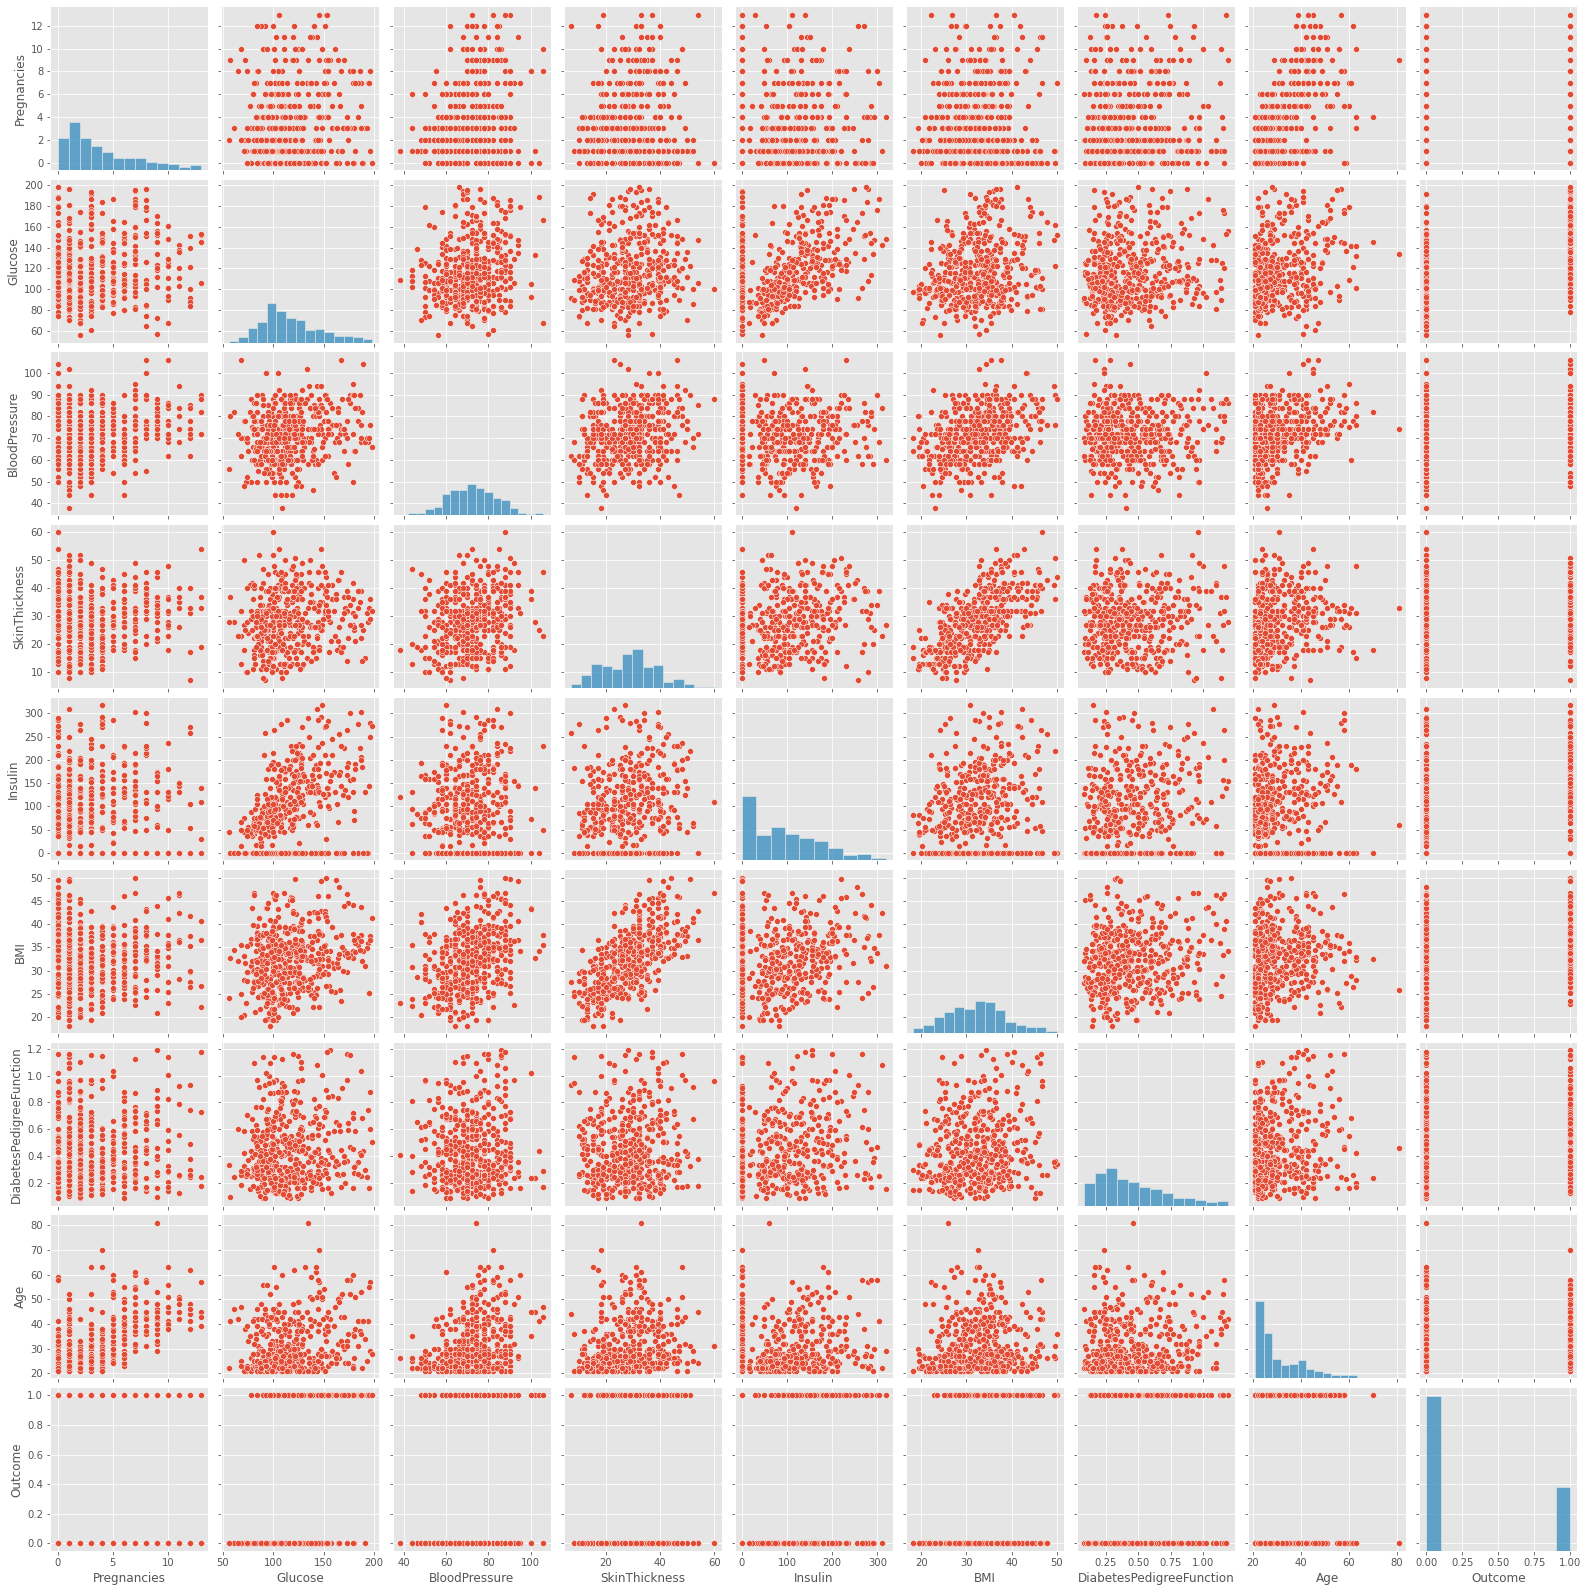

In [20]:
sns.pairplot(df)

<AxesSubplot:>

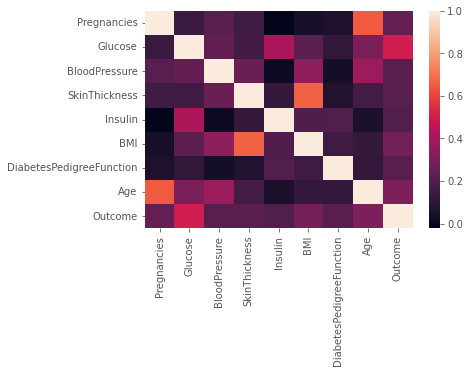

In [21]:
sns.heatmap(df.corr())

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134194,0.216065,0.150268,-0.022198,0.042749,0.054990,0.647881,0.246886
Glucose,0.134194,1.000000,0.239096,0.156539,0.406984,0.223491,0.110996,0.294049,0.497618
BloodPressure,0.216065,0.239096,1.000000,0.254044,0.009813,0.341752,0.033150,0.373748,0.211477
SkinThickness,0.150268,0.156539,0.254044,1.000000,0.118589,0.662861,0.069165,0.160892,0.214327
Insulin,-0.022198,0.406984,0.009813,0.118589,1.000000,0.190551,0.193912,0.050497,0.193540
BMI,0.042749,0.223491,0.341752,0.662861,0.190551,1.000000,0.148231,0.119471,0.280207
DiabetesPedigreeFunction,0.054990,0.110996,0.033150,0.069165,0.193912,0.148231,1.000000,0.116831,0.211949
Age,0.647881,0.294049,0.373748,0.160892,0.050497,0.119471,0.116831,1.000000,0.303900
Outcome,0.246886,0.497618,0.211477,0.214327,0.193540,0.280207,0.211949,0.303900,1.000000


The table shows the correlation of each of the feature columns to the target column. 

# **IMPLEMENTING DECISION TREE ML ALGORITHM**

In [23]:
X = df.drop(['Outcome'], axis = 1)
y = df.Outcome

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = 0.3, random_state = 100)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifer.fit(X_train,y_train)
y_pred = classifer.predict(X_test)
print('The accuracy of the Decision Tree Classifier is :', accuracy_score(y_pred,y_test))

The accuracy of the Decision Tree Classifier is : 0.7697841726618705


The result above shows that the decision algorithm has an accuracy of 76.98%

# PLOTTING THE DECISION TREE

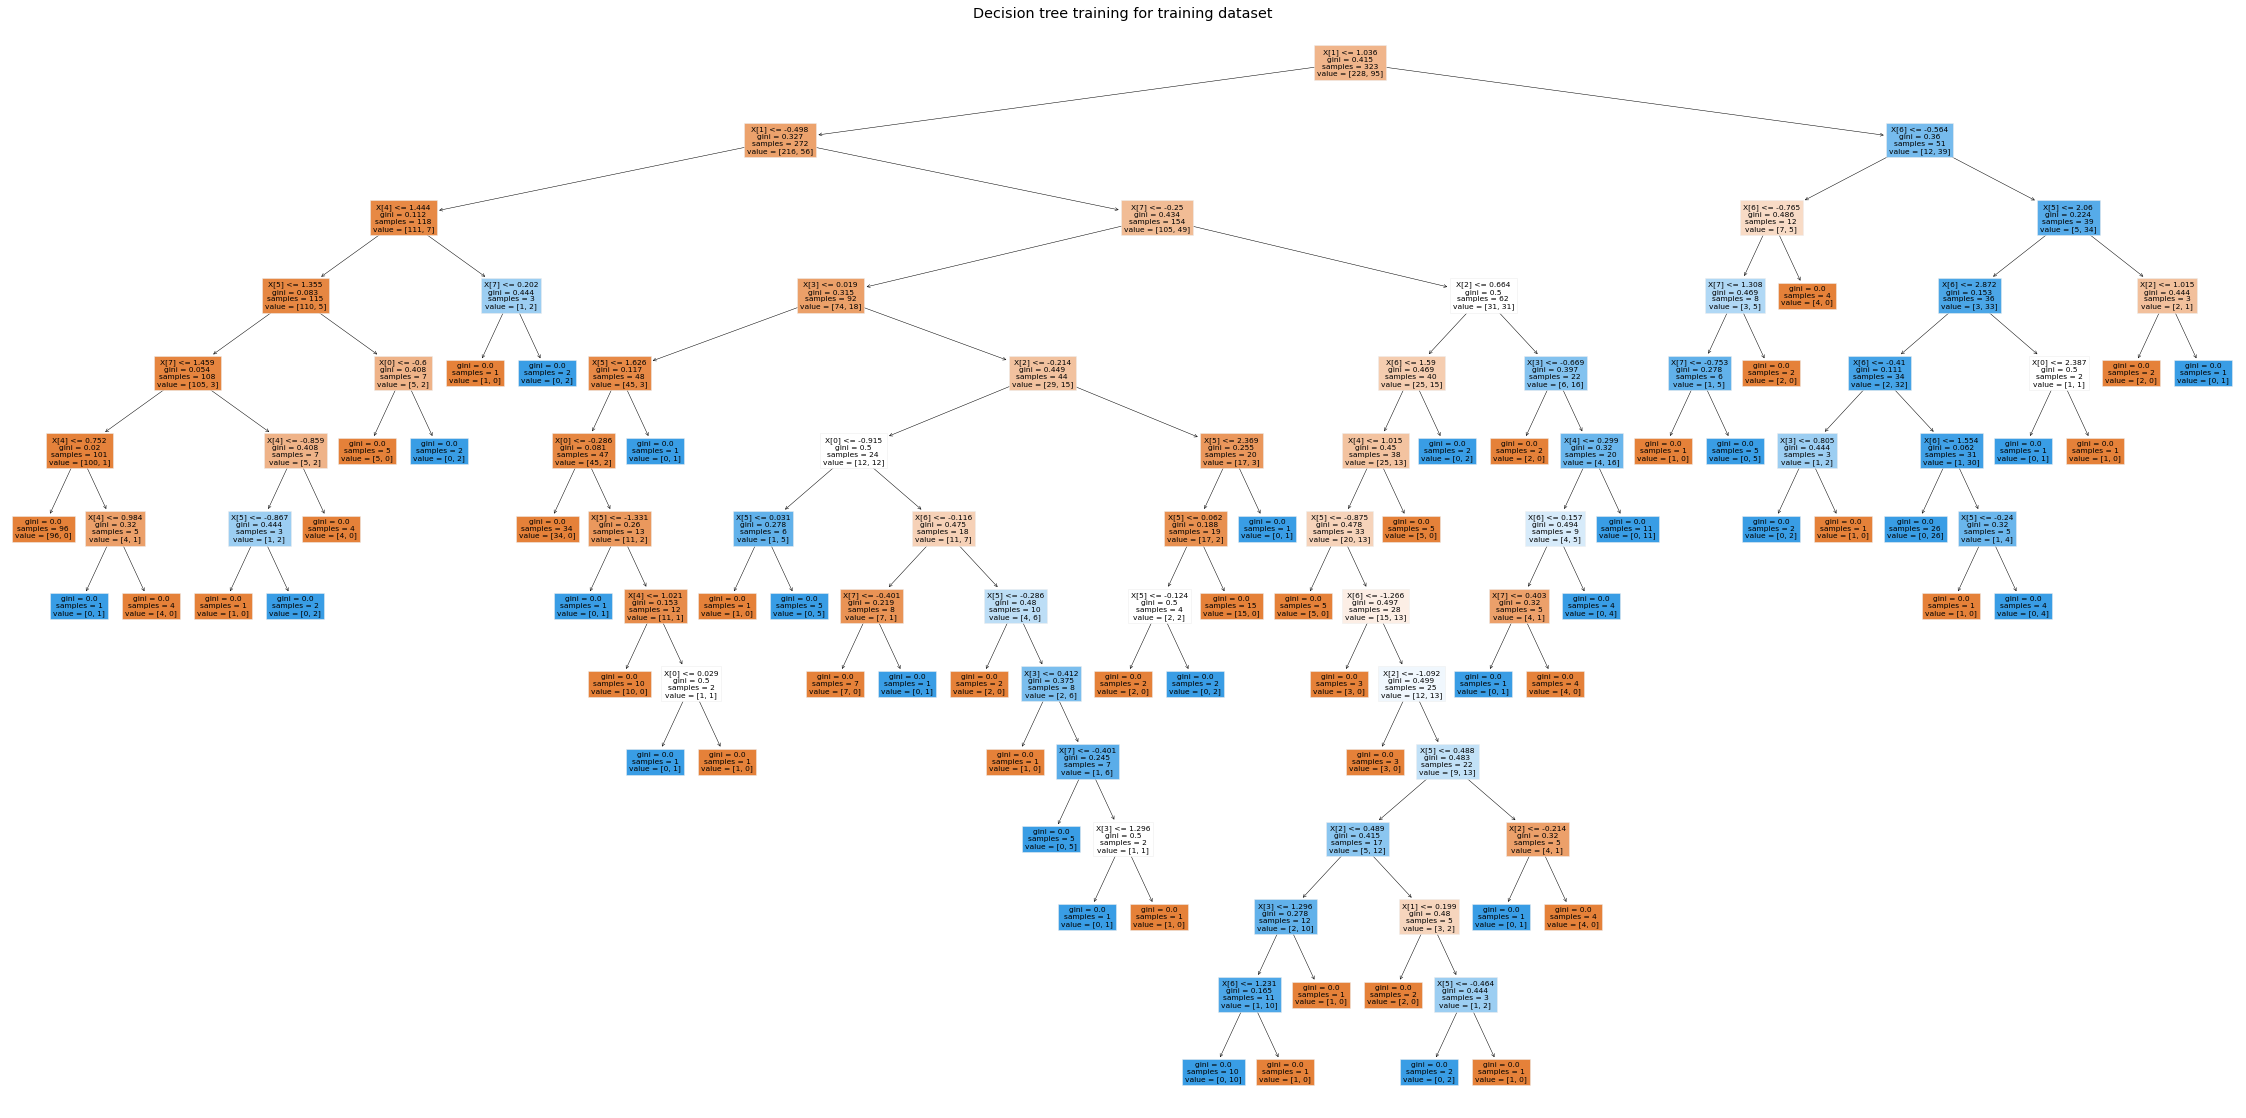

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()


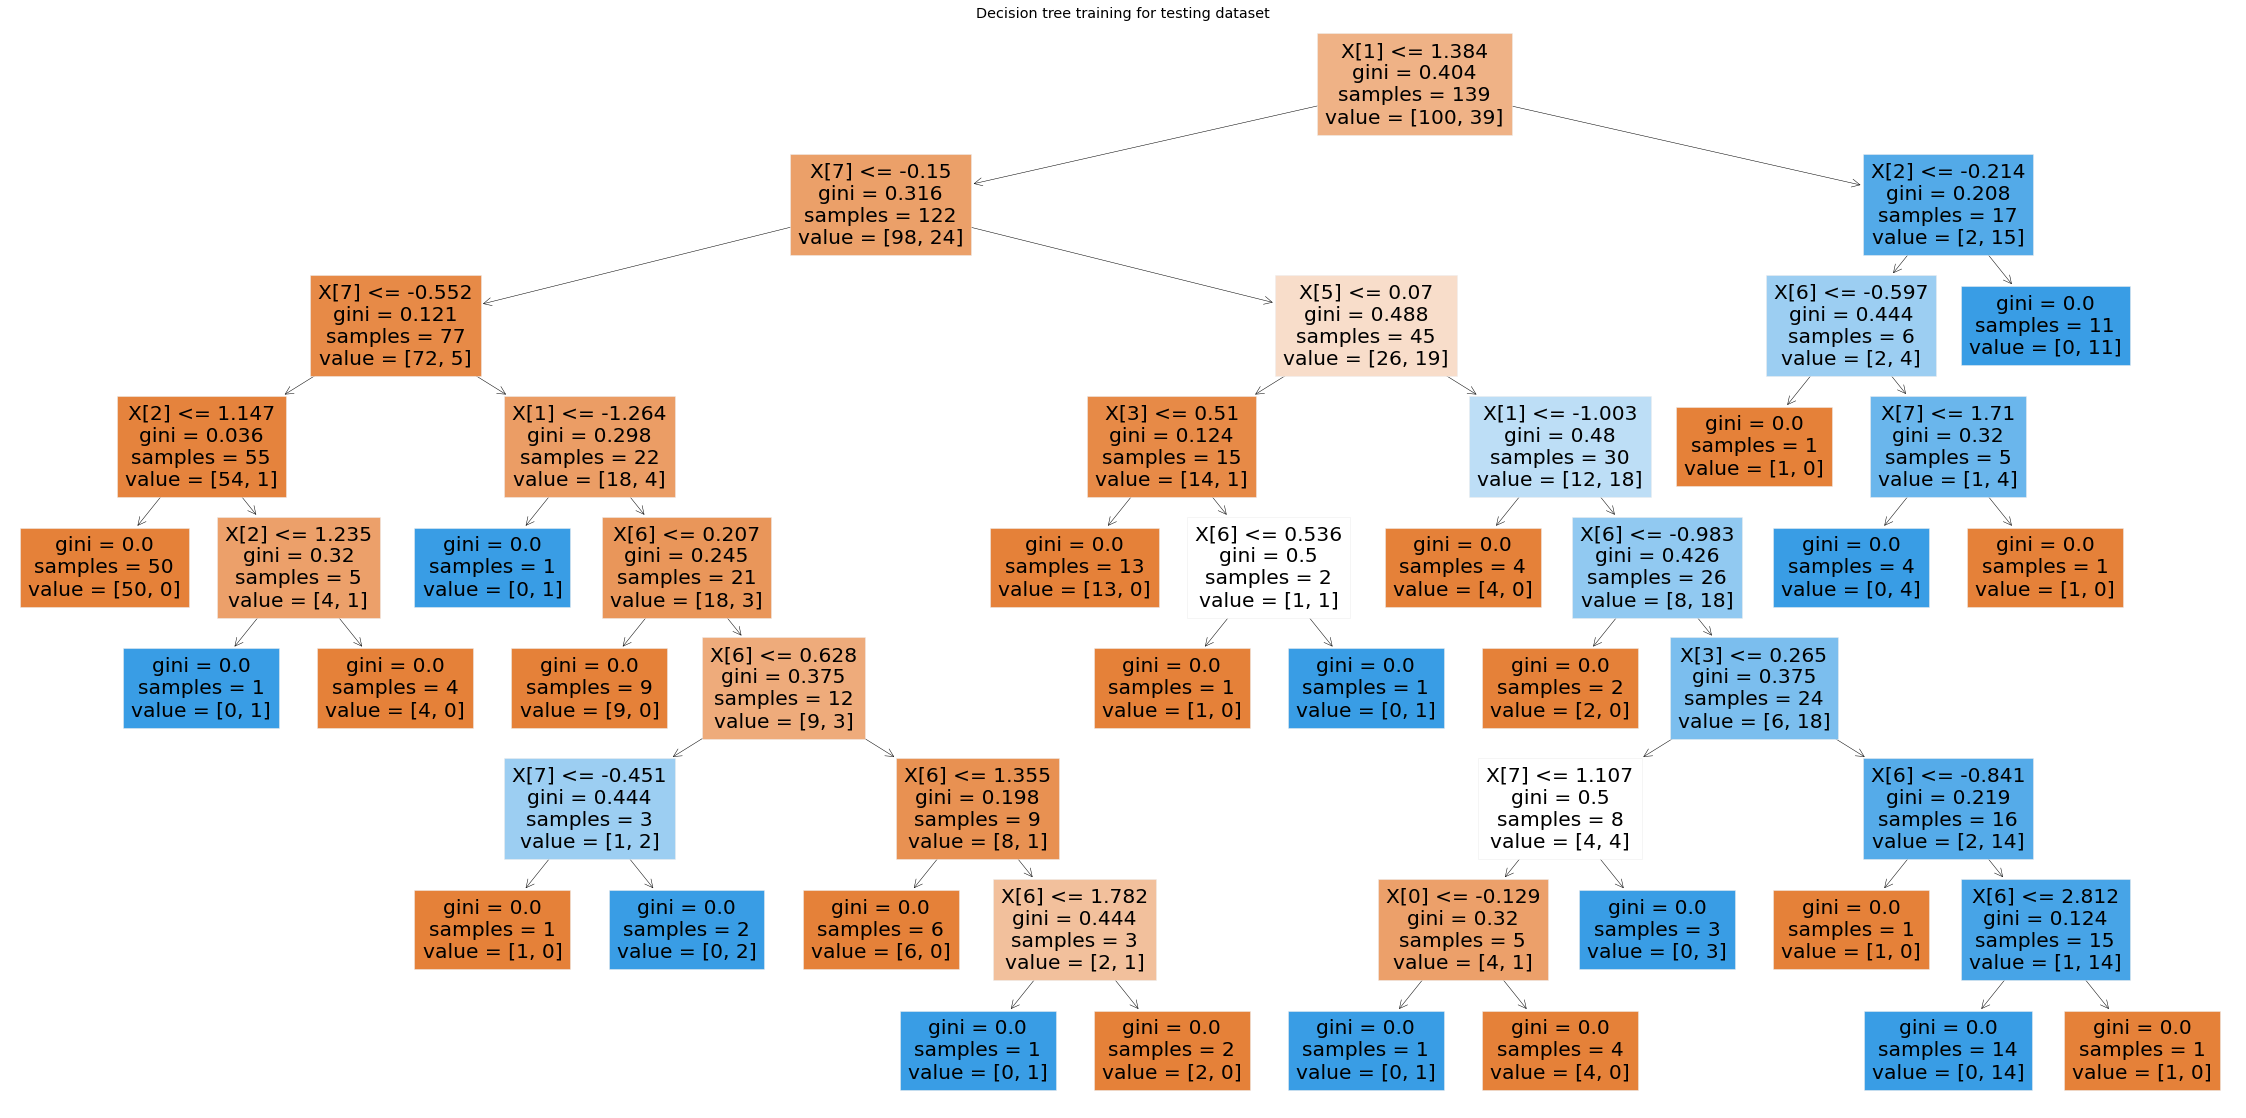

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
plt.figure(figsize=(40,20))
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy-score: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision-score: {precision_score(y_test, y_pred):.2f}')
print(f'Recall-score: {recall_score(y_test, y_pred):.2f}')
print(f'F1-score: {f1_score(y_test, y_pred):.2f}')

Accuracy-score: 0.77
Precision-score: 0.60
Recall-score: 0.54
F1-score: 0.57


The result above shows that the Precision score is 0.60 and the F1 score is 0.57

# IMPLEMENTING  ARRTIFICIAL NEURAL NETWORK ALGORITHM USING TENSORFLOW



In [31]:
import tensorflow as tf

In [34]:
X = df.drop(['Outcome'], axis = 1) # Feature variables
y = df.Outcome  #Target variable

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Starting the ANN Sequence**

In [37]:
ann = tf.keras.models.Sequential()

In [38]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [39]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [40]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [41]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [42]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
11/11 [==============================] - 2s 3ms/step - loss: 0.9776 - accuracy: 0.3065
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9205 - accuracy: 0.3096
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 0.8681 - accuracy: 0.3220
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.8309 - accuracy: 0.3560
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7964 - accuracy: 0.3932
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7661 - accuracy: 0.4180
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7390 - accuracy: 0.4830
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7161 - accuracy: 0.5387
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5882
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.6037
Epoch 11/

**The Accuracy of the Neural Network Created is 81.42%**

**Predicting result for Single Observations**

In [43]:
print(ann.predict(sc.transform([[0, 0, 0, 0, 0, 0, 0, 21]])) > 0.5)

1/1 [==============================] - 0s 118ms/step
[[False]]


In [44]:
print(ann.predict(sc.transform([[0, 0, 0, 600, 1, 40, 3, 2]])) > 0.5)

1/1 [==============================] - 0s 25ms/step
[[False]]


In [45]:
print(ann.predict(sc.transform([[0, 0, 0, 600, 1, 40, 3, 2]])) < 0.5)

1/1 [==============================] - 0s 32ms/step
[[ True]]


**Saving the created neural network**

In [46]:
ann.save("ANN.h5")

**Printng the Confusion matrix, Precision, Recall and F1 score of the Model**

In [47]:
from sklearn.metrics import classification_report
y_pred = ann.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
print(classification_report(y_test, y_pred))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       100
           1       0.71      0.56      0.63        39

    accuracy                           0.81       139
   macro avg       0.78      0.74      0.75       139
weighted avg       0.81      0.81      0.81       139



In [48]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)

# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

5/5 [==============================] - 0s 3ms/step
0.7761350059737157
0.737051282051282
0.7517857142857143
